# Create analysis object

- Grab the files from GEO
- Download and parse the metadata using `ffq`
- Create AnnData object; write to file
- Sanity check

In [26]:
%load_ext autoreload
%autoreload 2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
%%capture
!wget "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE141797&format=file&file=GSE141797%5FAHLWHFBGX5%5Fcuff%5Fcell%5Flist%2Etxt%2Egz" -O ../metadata/GSE141797_AHLWHFBGX5_cuff_cell_list.txt.gz
!wget "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE141797&format=file&file=GSE141797%5FAHLWHFBGX5%5Fcuff%5FfpkmTable%2Ecsv%2Egz" -O ../metadata/GSE141797_AHLWHFBGX5_cuff_fpkmTable.csv.gz
!wget "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE141797&format=file&file=GSE141797%5FAHM7F7BGX5%5Fcuff%5Fcell%5Flist%2Etxt%2Egz" -O ../metadata/GSE141797_AHM7F7BGX5_cuff_cell_list.txt.gz
!wget "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE141797&format=file&file=GSE141797%5FAHM7F7BGX5%5Fcuff%5FfpkmTable%2Ecsv%2Egz" -O ../metadata/GSE141797_AHM7F7BGX5_cuff_fpkmTable.csv.gz

!gunzip -f ../metadata/GSE141797_AHLWHFBGX5_cuff_cell_list.txt.gz
!gunzip -f ../metadata/GSE141797_AHLWHFBGX5_cuff_fpkmTable.csv.gz
!gunzip -f ../metadata/GSE141797_AHM7F7BGX5_cuff_cell_list.txt.gz
!gunzip -f ../metadata/GSE141797_AHM7F7BGX5_cuff_fpkmTable.csv.gz

# Read in cell lists from both experiments

We concatenated the two cell lists into a single file.

In [8]:
cell_list_paths = ['../metadata/GSE141797_AHLWHFBGX5_cuff_cell_list.txt', '../metadata/GSE141797_AHM7F7BGX5_cuff_cell_list.txt']

cell_list = []
for cell_list_path in cell_list_paths:
    cell_list.extend([line.strip() for line in open(cell_list_path, 'r').readlines()])
len(cell_list)
cell_list

34

['pp1_2/20_S7',
 'pp1_2/23_S10',
 'pp1_2/14_S2',
 'pp1_2/29_S16',
 'pp1_2/13_S1',
 'pp1_2/22_S9',
 'pp1_2/28_S15',
 'pp1_2/25_S12',
 'pp1_2/24_S11',
 'pp1_2/Undetermined_S0',
 'pp1_2/19_S6',
 'pp1_2/27_S14',
 'pp1_2/21_S8',
 'pp1_2/16_S3',
 'pp1_2/26_S13',
 'pp1_2/18_S5',
 'pp1_2/17_S4',
 'pp2_2/Undetermined_S0',
 'pp2_2/20_S7',
 'pp2_2/23_S10',
 'pp2_2/22_S9',
 'pp2_2/28_S15',
 'pp2_2/13_S1',
 'pp2_2/29_S16',
 'pp2_2/14_S2',
 'pp2_2/24_S11',
 'pp2_2/25_S12',
 'pp2_2/19_S6',
 'pp2_2/27_S14',
 'pp2_2/26_S13',
 'pp2_2/21_S8',
 'pp2_2/16_S3',
 'pp2_2/17_S4',
 'pp2_2/18_S5']

In [ ]:
!uv pip install pandas

Using Python 3.9.6 environment at: /Users/aru/Development/powerhouse-bio-takehome/.venv
Resolved 6 packages in 242ms                                         
⠙ Preparing packages... (0/4)                                                   
⠙ Preparing packages... (0/4)----     0 B/497.29 KiB                    
⠙ Preparing packages... (0/4)---- 16.00 KiB/497.29 KiB                  
⠙ Preparing packages... (0/4)---- 32.00 KiB/497.29 KiB                  
⠙ Preparing packages... (0/4)---- 48.00 KiB/497.29 KiB                  
⠙ Preparing packages... (0/4)---- 63.97 KiB/497.29 KiB                  
⠙ Preparing packages... (0/4)---- 79.97 KiB/497.29 KiB                  
⠙ Preparing packages... (0/4)---- 95.97 KiB/497.29 KiB                  
pytz       ------------------------------ 95.97 KiB/497.29 KiB
⠙ Preparing packages... (0/4)----     0 B/5.06 MiB                      
pytz       ------------------------------ 111.97 KiB/497.29 KiB
⠙ Preparing packages... (0/4)----     0 B/5.06 MiB

In [ ]:
!uv pip install gget ffq  # Fast NCBI searchers

Using Python 3.9.6 environment at: /Users/aru/Development/powerhouse-bio-takehome/.venv
Resolved 48 packages in 6ms                                          
Installed 1 package in 1ms                                  
 + gget==0.29.0


# Grab metadata for GSE141797

In [ ]:
!uv run ffq GSE141797 -o metadata/GSE141797_metadata.json

/Users/aru/Development/powerhouse-bio-takehome/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[2025-04-15 19:26:45,470]    INFO Parsing GEO GSE141797
[2025-04-15 19:26:46,392]    INFO Finding supplementary files for GEO GSE141797
[2025-04-15 19:26:48,860] WARNING There are 18 samples for GSE141797
[2025-04-15 19:26:48,860]    INFO Parsing GSM GSM4213364
[2025-04-15 19:26:49,042]    INFO Finding supplementary files for GSM GSM4213364
[2025-04-15 19:26:50,411]    INFO No supplementary files found for GSM4213364
[2025-04-15 19:26:50,831]    INFO Getting sample for GSM4213364
[2025-04-15 19:26:51,543]    INFO Parsing sample SRS5801758
[2025-04-15 19:26:51,945] WARNING Failed to parse sample information from ENA XML. Falling back to ENA search...
[2025-04-15 19:26:52,339]    INFO Getting Expe

In [9]:
import json

with open("metadata/GSE141797_metadata.json", "r") as f:
    metadata = json.load(f)

metadata

{'GSE141797': {'accession': 'GSE141797',
  'supplementary_files': [{'accession': 'GSE141797',
    'filename': 'GSE141797_AHLWHFBGX5_cuff_cell_list.txt.gz',
    'filetype': None,
    'filesize': 161,
    'filenumber': 1,
    'md5': None,
    'urltype': 'ftp',
    'url': 'ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE141nnn/GSE141797/suppl/GSE141797_AHLWHFBGX5_cuff_cell_list.txt.gz'},
   {'accession': 'GSE141797',
    'filename': 'GSE141797_AHLWHFBGX5_cuff_fpkmTable.csv.gz',
    'filetype': None,
    'filesize': 1070760,
    'filenumber': 2,
    'md5': None,
    'urltype': 'ftp',
    'url': 'ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE141nnn/GSE141797/suppl/GSE141797_AHLWHFBGX5_cuff_fpkmTable.csv.gz'},
   {'accession': 'GSE141797',
    'filename': 'GSE141797_AHLWHFBGX5_cuff_freatureCount.csv.gz',
    'filetype': None,
    'filesize': 507260,
    'filenumber': 3,
    'md5': None,
    'urltype': 'ftp',
    'url': 'ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE141nnn/GSE141797/suppl/GSE141797_AHLWHFBGX5

In [ ]:
!uv pip install anndata

Using Python 3.9.6 environment at: /Users/aru/Development/powerhouse-bio-takehome/.venv
Resolved 13 packages in 384ms                                        
⠙ Preparing packages... (0/5)                                                   
⠙ Preparing packages... (0/5)----     0 B/2.79 MiB                      
⠙ Preparing packages... (0/5)---- 14.95 KiB/2.79 MiB                    
⠙ Preparing packages... (0/5)---- 30.95 KiB/2.79 MiB                    
⠙ Preparing packages... (0/5)---- 46.95 KiB/2.79 MiB                    
⠙ Preparing packages... (0/5)---- 62.95 KiB/2.79 MiB                    
⠙ Preparing packages... (0/5)---- 78.95 KiB/2.79 MiB                    
⠙ Preparing packages... (0/5)---- 94.95 KiB/2.79 MiB                    
⠙ Preparing packages... (0/5)---- 110.95 KiB/2.79 MiB                   
⠙ Preparing packages... (0/5)---- 126.95 KiB/2.79 MiB                   
⠙ Preparing packages... (0/5)---- 142.95 KiB/2.79 MiB                   
natsort    --------------------

In [10]:
import json
import pandas as pd
import re

def parse_metadata(ffq_path):
    with open(ffq_path) as f:
        data = json.load(f)

    samples = data["GSE141797"]["geo_samples"]

    metadata = []

    for gsm, gsm_info in samples.items():
        for srs, srs_info in gsm_info["samples"].items():
            title = srs_info["title"]
            condition = "Healthy" if "Healthy" in title else "MS"
        cell_type = srs_info["attributes"].get("cell type", "")
        for srx, srx_info in srs_info["experiments"].items():
            for srr, srr_info in srx_info["runs"].items():
                for file in srr_info["files"]["aws"]:
                    fname = file["filename"]
                    if fname.endswith(".fastq.gz.1"):
                        sample_id = re.sub(r"\.fastq\.gz\..*$", "", fname)
                        metadata.append({
                            "GSM": gsm,
                            "SRS": srs,
                            "SRR": srr,
                            "Title": title,
                            "Condition": condition,
                            "CellType": cell_type,
                            "FASTQ": fname,
                            "sample": sample_id
                        })

    metadata = pd.DataFrame(metadata)
    return metadata


metadata = parse_metadata("metadata/GSE141797_metadata.json")
metadata.shape
metadata.head()

(18, 8)

,GSM,SRS,SRR,Title,Condition,CellType,FASTQ,sample
0,GSM4213364,SRS5801758,SRR10662892,MS patient Tfhs 1,MS,CSF Tfh cells,AHLWHFBGX5_17.fastq.gz.1,AHLWHFBGX5_17
1,GSM4213365,SRS5801759,SRR10662893,MS patient Tfhs 2,MS,CSF Tfh cells,AHLWHFBGX5_19.fastq.gz.1,AHLWHFBGX5_19
2,GSM4213366,SRS5801760,SRR10662894,MS patient Tfhs 3,MS,CSF Tfh cells,AHLWHFBGX5_20.fastq.gz.1,AHLWHFBGX5_20
3,GSM4213367,SRS5801761,SRR10662895,MS patient Tfhs 4,MS,CSF Tfh cells,AHLWHFBGX5_24.fastq.gz.1,AHLWHFBGX5_24
4,GSM4213368,SRS5801762,SRR10662896,MS patient Tfhs 5,MS,CSF Tfh cells,AHM7F7BGX5_18.fastq.gz.1,AHM7F7BGX5_18


In [11]:
import pandas as pd
import anndata as ad

_fpkm1 = pd.read_csv('../metadata/GSE141797_AHLWHFBGX5_cuff_fpkmTable.csv', index_col=[0])
_fpkm2 = pd.read_csv('../metadata/GSE141797_AHM7F7BGX5_cuff_fpkmTable.csv', index_col=[0])

fpkm = _fpkm1.merge(_fpkm2)
fpkm.columns = fpkm.columns.str.strip()  # annoying
fpkm.shape
fpkm.head()

(29916, 21)

,geneID,geneName,geneBiotype,AHLWHFBGX5_20,AHLWHFBGX5_23,AHLWHFBGX5_22,AHLWHFBGX5_24,AHLWHFBGX5_19,AHLWHFBGX5_21,AHLWHFBGX5_18,...,AHM7F7BGX5_20,AHM7F7BGX5_23,AHM7F7BGX5_22,AHM7F7BGX5_29,AHM7F7BGX5_24,AHM7F7BGX5_25,AHM7F7BGX5_19,AHM7F7BGX5_26,AHM7F7BGX5_21,AHM7F7BGX5_18
0,gene45229,A1BG,protein_coding,0.210992,0.047923,0.210714,0.130501,0.496653,0.166574,0.000000,...,0.000000,0.105235,0.104009,0.000000,0.000000,0.000000,0.056969,0.000000,0.000000,0.000000
1,gene45230,A1BG-AS1,antisense,0.042779,0.000000,0.000000,0.035279,0.115083,0.000000,0.086827,...,0.221958,0.000000,0.290135,0.000000,1.478460,0.184052,0.979699,0.664599,0.000000,0.135405
2,gene26185,A1CF,protein_coding,0.191612,0.331608,0.364859,0.305725,0.245885,0.402296,0.296806,...,0.036002,0.081539,0.156868,0.000000,0.327012,0.000000,0.441413,0.239553,0.000000,0.137268
3,gene30514,A2M,protein_coding,0.155464,0.269206,0.287507,0.113961,0.249098,0.204685,0.225527,...,0.284643,0.348367,0.234593,0.418734,0.256148,0.414624,0.018831,0.242696,0.167894,0.463463
4,gene30513,A2M-AS1,antisense,0.041550,0.226494,0.331957,0.137060,0.167662,0.262419,0.927640,...,0.261660,0.352978,0.305587,0.000000,0.353908,0.090406,1.034960,0.181479,0.340355,0.166386


In [ ]:
fpkm.loc[:, metadata.index]

sample,AHLWHFBGX5_17,AHLWHFBGX5_19,AHLWHFBGX5_20,AHLWHFBGX5_24,AHM7F7BGX5_18,AHM7F7BGX5_19,AHM7F7BGX5_20,AHM7F7BGX5_21,AHM7F7BGX5_29,AHLWHFBGX5_18,AHLWHFBGX5_21,AHLWHFBGX5_22,AHLWHFBGX5_23,AHM7F7BGX5_22,AHM7F7BGX5_23,AHM7F7BGX5_24,AHM7F7BGX5_25,AHM7F7BGX5_26
0,0.048404,0.496653,0.210992,0.130501,0.000000,0.056969,0.000000,0.000000,0.000000,0.000000,0.166574,0.210714,0.047923,0.104009,0.105235,0.000000,0.000000,0.000000
1,0.039256,0.115083,0.042779,0.035279,0.135405,0.979699,0.221958,0.000000,0.000000,0.086827,0.000000,0.000000,0.000000,0.290135,0.000000,1.478460,0.184052,0.664599
2,0.260032,0.245885,0.191612,0.305725,0.137268,0.441413,0.036002,0.000000,0.000000,0.296806,0.402296,0.364859,0.331608,0.156868,0.081539,0.327012,0.000000,0.239553
3,0.275275,0.249098,0.155464,0.113961,0.463463,0.018831,0.284643,0.167894,0.418734,0.225527,0.204685,0.287507,0.269206,0.234593,0.348367,0.256148,0.414624,0.242696
4,0.343147,0.167662,0.041550,0.137060,0.166386,1.034960,0.261660,0.340355,0.000000,0.927640,0.262419,0.331957,0.226494,0.305587,0.352978,0.353908,0.090406,0.181479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29911,0.247562,0.467573,0.121709,0.409027,0.791014,5.270630,1.126120,0.517511,1.752680,0.241800,0.470595,0.620009,0.369670,1.034630,2.141130,4.473560,0.649159,0.557632
29912,0.888155,1.223140,1.187960,1.085390,0.227213,0.194109,0.158182,0.421949,0.561233,0.746025,0.913461,1.057640,1.007010,0.510325,0.283171,0.103242,0.692747,0.416203
29913,1.436000,1.421480,3.454030,1.485010,0.919027,3.219320,0.936175,0.736741,2.527240,1.194130,0.742817,1.619190,1.283520,1.600410,1.590760,3.356530,0.848832,0.699087
29914,1.145820,1.414980,1.691200,0.755998,1.031760,16.971700,3.630800,1.803580,2.696850,0.447869,1.097600,1.582220,0.768757,2.083260,6.266660,21.371700,1.299980,3.129760


In [12]:
import anndata as ad
import pandas as pd

def make_anndata(fpkm_df: pd.DataFrame, meta_df: pd.DataFrame) -> ad.AnnData:
    # Extract gene annotations
    gene_meta = fpkm_df[["geneID", "geneName", "geneBiotype"]].copy()
    gene_meta.rename(columns={"geneName": "symbol"}, inplace=True)
    gene_meta.set_index("symbol", inplace=True)

    # Get expression matrix and align to geneName (symbol) index
    expr_df = fpkm_df.drop(columns=["geneID", "geneName", "geneBiotype"])
    expr_df.index = gene_meta.index  # Set index to geneName / symbol

    # Transpose so samples are rows
    X = expr_df.T.copy()
    X.index.name = "sample"

    # Align metadata
    meta_df = meta_df.set_index("sample").loc[X.index]

    # Create AnnData object
    adata = ad.AnnData(X=X, obs=meta_df, var=gene_meta)

    return adata

adata = make_anndata(fpkm, metadata)
adata.shape
adata.obs.head()
adata.var.head()
adata.to_df().head()

/Users/aru/Development/powerhouse-bio-takehome/.venv/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


(18, 29916)

,GSM,SRS,SRR,Title,Condition,CellType,FASTQ
sample,,,,,,,
AHLWHFBGX5_20,GSM4213366,SRS5801760,SRR10662894,MS patient Tfhs 3,MS,CSF Tfh cells,AHLWHFBGX5_20.fastq.gz.1
AHLWHFBGX5_23,GSM4213376,SRS5801770,SRR10662904,Healthy control Tfhs 4,Healthy,CSF Tfh cells,AHLWHFBGX5_23.fastq.gz.1
AHLWHFBGX5_22,GSM4213375,SRS5801769,SRR10662903,Healthy control Tfhs 3,Healthy,CSF Tfh cells,AHLWHFBGX5_22.fastq.gz.1
AHLWHFBGX5_24,GSM4213367,SRS5801761,SRR10662895,MS patient Tfhs 4,MS,CSF Tfh cells,AHLWHFBGX5_24.fastq.gz.1
AHLWHFBGX5_19,GSM4213365,SRS5801759,SRR10662893,MS patient Tfhs 2,MS,CSF Tfh cells,AHLWHFBGX5_19.fastq.gz.1


,geneID,geneBiotype
symbol,,
A1BG,gene45229,protein_coding
A1BG-AS1,gene45230,antisense
A1CF,gene26185,protein_coding
A2M,gene30514,protein_coding
A2M-AS1,gene30513,antisense


symbol,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
sample,,,,,,,,,,,,,,,,,,,,,
AHLWHFBGX5_20,0.210992,0.042779,0.191612,0.155464,0.041550,0.022982,0.082640,0.000000,0.043569,0.052580,...,0.420786,0.438581,0.494358,0.893930,1.397320,0.121709,1.18796,3.45403,1.691200,3.209580
AHLWHFBGX5_23,0.047923,0.000000,0.331608,0.269206,0.226494,0.318085,0.000000,0.000000,0.000000,0.334393,...,0.254859,0.056919,0.239541,0.302840,1.138340,0.369670,1.00701,1.28352,0.768757,1.243130
AHLWHFBGX5_22,0.210714,0.000000,0.364859,0.287507,0.331957,0.126441,0.440165,0.133957,0.049044,0.070014,...,0.224131,0.000000,0.351079,0.342977,1.273380,0.620009,1.05764,1.61919,1.582220,0.888131
AHLWHFBGX5_24,0.130501,0.035279,0.305725,0.113961,0.137060,0.306156,0.204455,0.000000,0.000000,0.000000,...,0.416418,0.155008,0.550377,0.443573,1.163850,0.409027,1.08539,1.48501,0.755998,1.714430
AHLWHFBGX5_19,0.496653,0.115083,0.245885,0.249098,0.167662,0.174823,0.000000,0.000000,0.104601,0.353620,...,0.222466,0.505654,0.310310,0.550254,0.976564,0.467573,1.22314,1.42148,1.414980,0.857409


# Sanity check

In [28]:
from utils import run_pca, run_umap, plot_pca, plot_umap

In [32]:
adata.obs.head()

,GSM,SRS,SRR,Title,Condition,CellType,FASTQ
sample,,,,,,,
AHLWHFBGX5_20,GSM4213366,SRS5801760,SRR10662894,MS patient Tfhs 3,MS,CSF Tfh cells,AHLWHFBGX5_20.fastq.gz.1
AHLWHFBGX5_23,GSM4213376,SRS5801770,SRR10662904,Healthy control Tfhs 4,Healthy,CSF Tfh cells,AHLWHFBGX5_23.fastq.gz.1
AHLWHFBGX5_22,GSM4213375,SRS5801769,SRR10662903,Healthy control Tfhs 3,Healthy,CSF Tfh cells,AHLWHFBGX5_22.fastq.gz.1
AHLWHFBGX5_24,GSM4213367,SRS5801761,SRR10662895,MS patient Tfhs 4,MS,CSF Tfh cells,AHLWHFBGX5_24.fastq.gz.1
AHLWHFBGX5_19,GSM4213365,SRS5801759,SRR10662893,MS patient Tfhs 2,MS,CSF Tfh cells,AHLWHFBGX5_19.fastq.gz.1


In [35]:
adata.obs

,GSM,SRS,SRR,Title,Condition,CellType,FASTQ
sample,,,,,,,
AHLWHFBGX5_20,GSM4213366,SRS5801760,SRR10662894,MS patient Tfhs 3,MS,CSF Tfh cells,AHLWHFBGX5_20.fastq.gz.1
AHLWHFBGX5_23,GSM4213376,SRS5801770,SRR10662904,Healthy control Tfhs 4,Healthy,CSF Tfh cells,AHLWHFBGX5_23.fastq.gz.1
AHLWHFBGX5_22,GSM4213375,SRS5801769,SRR10662903,Healthy control Tfhs 3,Healthy,CSF Tfh cells,AHLWHFBGX5_22.fastq.gz.1
AHLWHFBGX5_24,GSM4213367,SRS5801761,SRR10662895,MS patient Tfhs 4,MS,CSF Tfh cells,AHLWHFBGX5_24.fastq.gz.1
AHLWHFBGX5_19,GSM4213365,SRS5801759,SRR10662893,MS patient Tfhs 2,MS,CSF Tfh cells,AHLWHFBGX5_19.fastq.gz.1
AHLWHFBGX5_21,GSM4213374,SRS5801768,SRR10662902,Healthy control Tfhs 2,Healthy,CSF Tfh cells,AHLWHFBGX5_21.fastq.gz.1
AHLWHFBGX5_18,GSM4213373,SRS5801767,SRR10662901,Healthy control Tfhs 1,Healthy,CSF Tfh cells,AHLWHFBGX5_18.fastq.gz.1
AHLWHFBGX5_17,GSM4213364,SRS5801758,SRR10662892,MS patient Tfhs 1,MS,CSF Tfh cells,AHLWHFBGX5_17.fastq.gz.1
AHM7F7BGX5_20,GSM4213370,SRS5801764,SRR10662898,MS patient Tfhs 7,MS,CSF Tfh cells,AHM7F7BGX5_20.fastq.gz.1


AnnData object with n_obs × n_vars = 18 × 29916
    obs: 'GSM', 'SRS', 'SRR', 'Title', 'Condition', 'CellType', 'FASTQ'
    var: 'geneID', 'geneBiotype'
    uns: 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'

/Users/aru/Development/powerhouse-bio-takehome/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/aru/Development/powerhouse-bio-takehome/.venv/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


AnnData object with n_obs × n_vars = 18 × 29916
    obs: 'GSM', 'SRS', 'SRR', 'Title', 'Condition', 'CellType', 'FASTQ'
    var: 'geneID', 'geneBiotype'
    uns: 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'

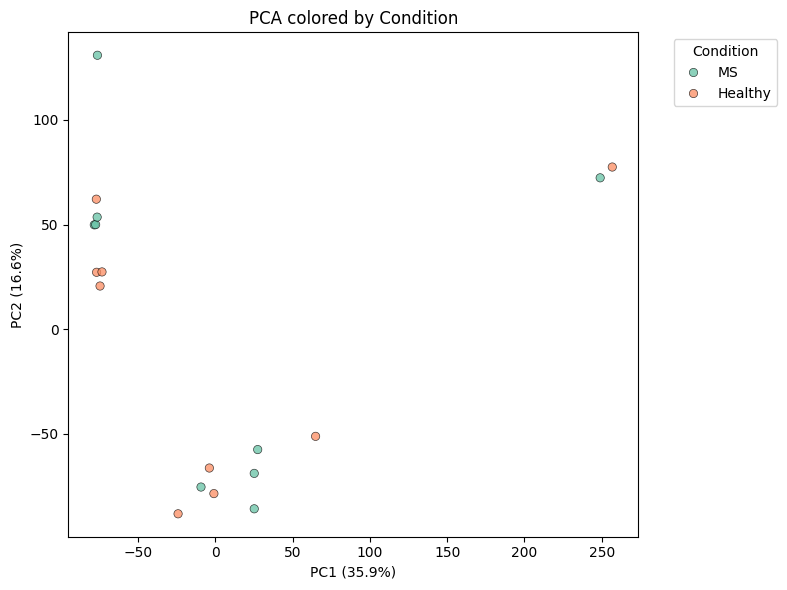

In [33]:
run_pca(adata=adata, n_components=2)
run_umap(adata=adata, n_components=2)

plot_pca(adata=adata, obs_column='Condition')


/Users/aru/Development/powerhouse-bio-takehome/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/aru/Development/powerhouse-bio-takehome/.venv/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


AnnData object with n_obs × n_vars = 18 × 29916
    obs: 'GSM', 'SRS', 'SRR', 'Title', 'Condition', 'CellType', 'FASTQ'
    var: 'geneID', 'geneBiotype'
    uns: 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'

/Users/aru/Development/powerhouse-bio-takehome/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/aru/Development/powerhouse-bio-takehome/.venv/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


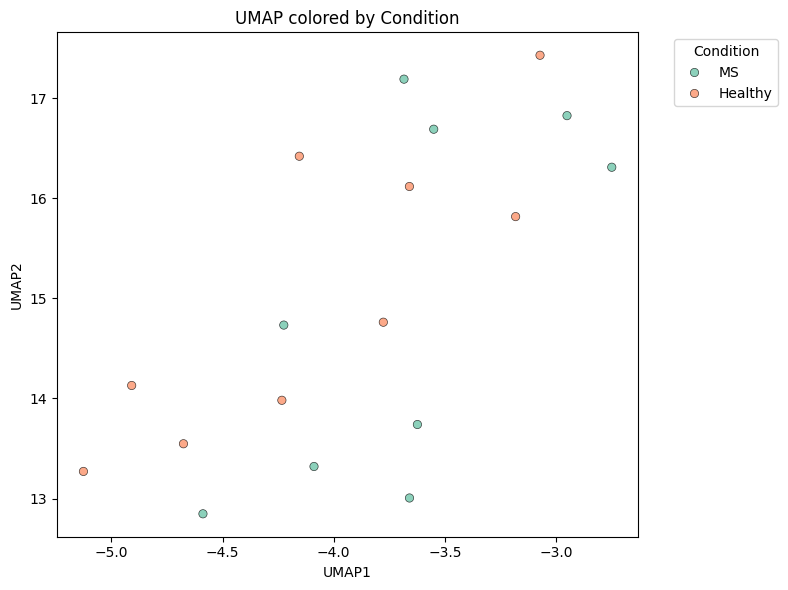

In [45]:
run_umap(adata, n_components=2)

plot_umap(adata, obs_column='Condition')

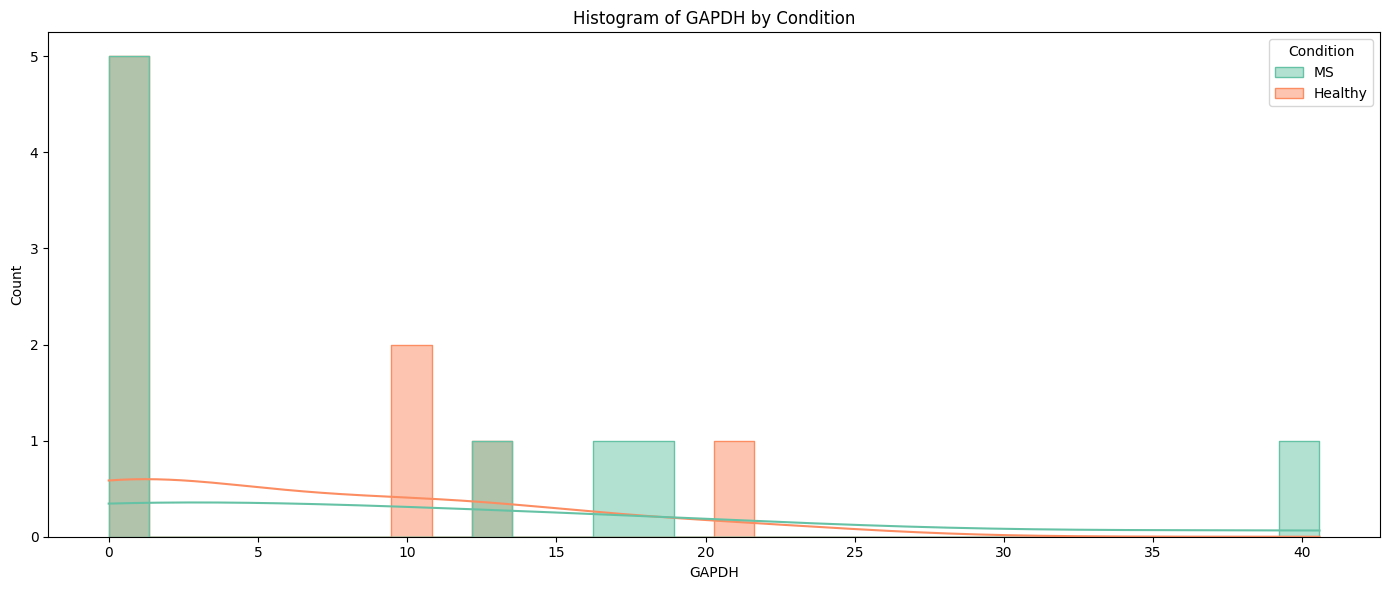

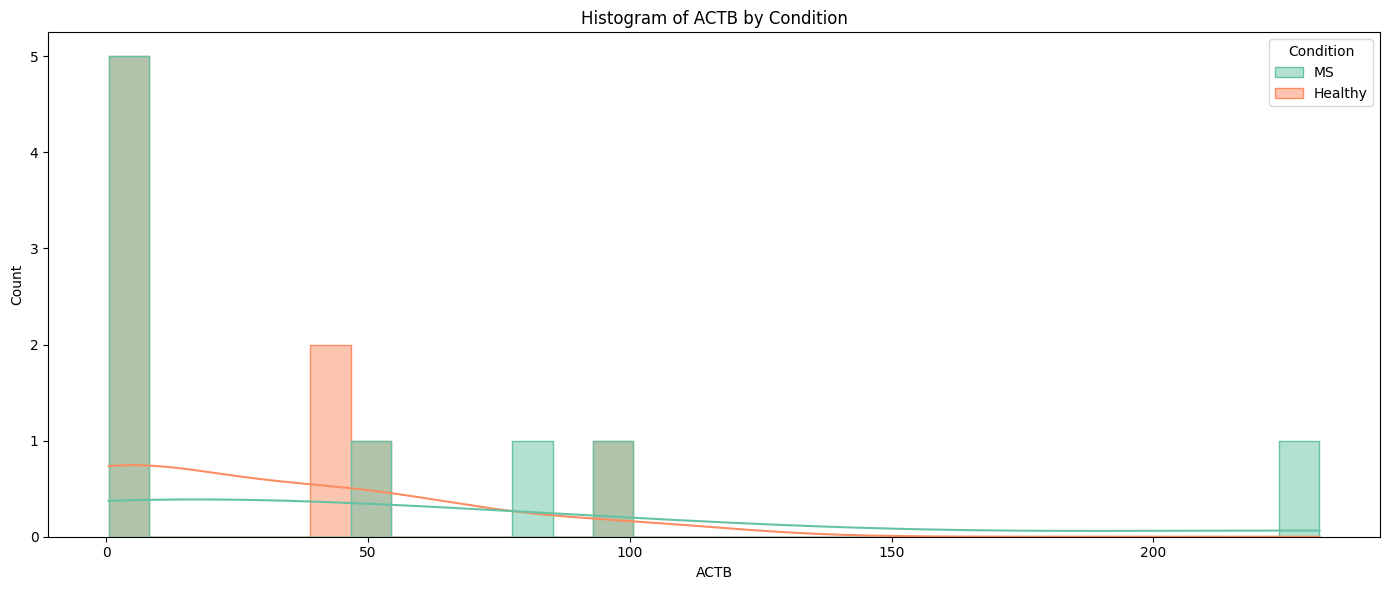

In [44]:
from utils import plot_histograms

plot_histograms(adata=adata, obs_column='Condition', var_names=['GAPDH', 'ACTB'])